In [1]:
!pip install visualkeras
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Activations
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import visualkeras 
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
import matplotlib.gridspec as gridspec

     |████████████████████████████████| 992 kB 4.7 MB/s 


In [2]:
def get_images(directory):
  Images = []
  Labels = []
  label = 0
  for labels in os.listdir(directory):
    if labels == 'glacier': 
      label = 2
    elif labels == 'sea':
      label = 4
    elif labels == 'buildings':
      label = 0
    elif labels == 'forest':
      label = 1
    elif labels == 'street':
      label = 5
    elif labels == 'mountain':
      label = 3

    for image_file in os.listdir(directory+labels):
      image = cv2.imread(directory+labels+r'/'+image_file)
      image = cv2.resize(image,(150,150))

      Images.append(image)
      Labels.append(label)
  return shuffle(Images,Labels,random_state=42)

def get_classlabel(class_code):
  labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}

  return labels[class_code]


In [3]:
Images, Labels = get_images('/content/drive/MyDrive/Dataset/scenery/seg_train/seg_train/')

Images = np.array(Images)
Labels = np.array(Labels)

In [4]:
print('Shape of Images', Images.shape)
print('Shape of Labels', Labels.shape)

Shape of Images (14034, 150, 150, 3)
Shape of Labels (14034,)


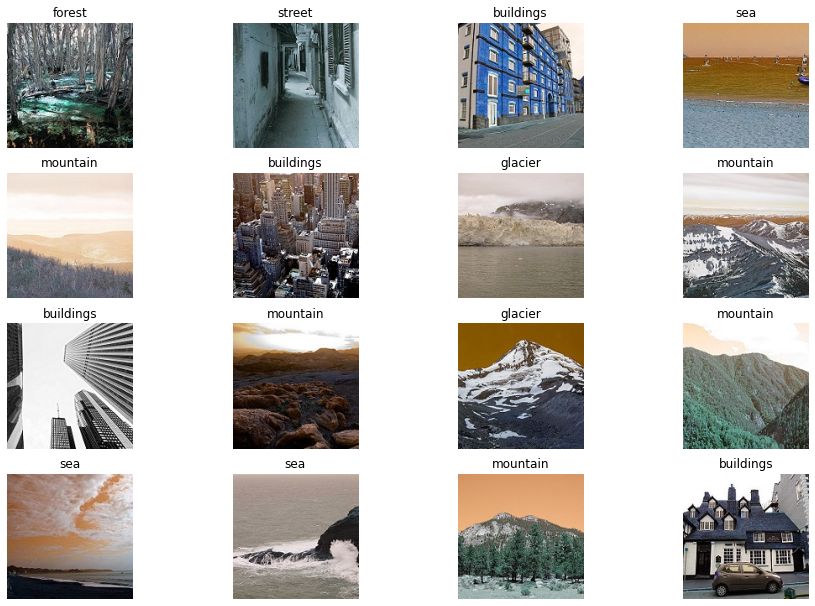

In [5]:
f,ax = plt.subplots(4,4)
f.subplots_adjust(1,1,3,3)
for i in range (0,4,1):
  for j in range(0,4,1):
    rnd_number = randint(0,len(Images))
    ax[i,j].imshow(Images[rnd_number])
    ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
    ax[i,j].axis('off')

In [6]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 200)     5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 180)     324180    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 180)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 180)       291780    
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 140)       226940    
                                                                 
 conv2d_4 (Conv2D)           (None, 23, 23, 100)       126100    
                                                        

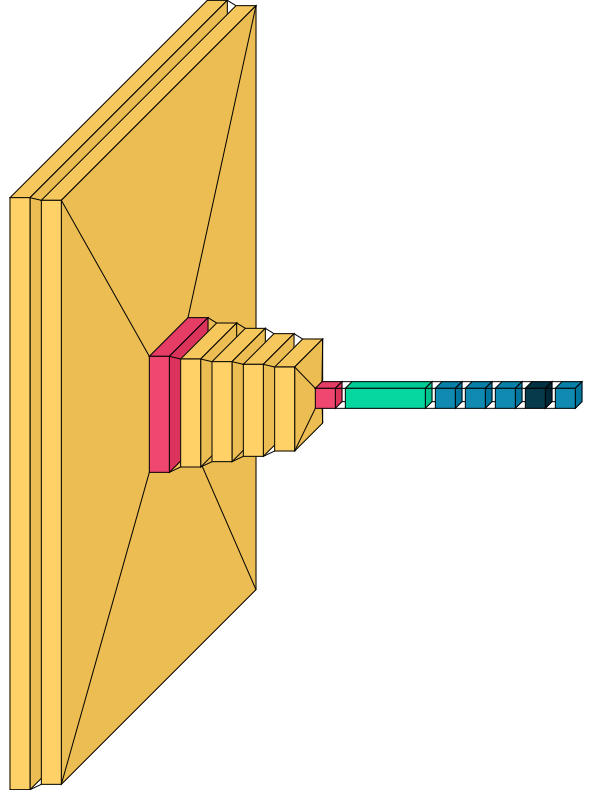

In [7]:
visualkeras.layered_view(model)

In [8]:
model.compile(optimizer=Optimizer.Adam(lr=0.0001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
callbacks = EarlyStopping(monitor='accuracy',mode='max',patience=3)
history = model.fit(Images,Labels,epochs=35,validation_split=0.30,callbacks =[callbacks])

Epoch 1/35
307/307 [==============================] - 104s 287ms/step - loss: 1.5255 - accuracy: 0.3959 - val_loss: 1.0958 - val_accuracy: 0.5609
Epoch 2/35
307/307 [==============================] - 87s 284ms/step - loss: 1.1239 - accuracy: 0.5494 - val_loss: 0.9396 - val_accuracy: 0.6243
Epoch 3/35
156/307 [==============>...............] - ETA: 37s - loss: 0.9975 - accuracy: 0.6212

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model_json = model.to_json()
with open("model_sequential.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_sequential.h5")
print("Saved model to disk")

In [ ]:
test_images,test_labels = get_images('/content/drive/MyDrive/Dataset/scenery/seg_test/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

In [ ]:
pred_images,no_labels = get_images('/content/drive/MyDrive/Dataset/scenery/seg_pred/')
pred_images = np.array(pred_images)
pred_images.shape

In [ ]:
fig = plt.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plt.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plt.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()